# Avocado analysis

Avocado is a fruit consumed by people heavily in the United States. Most of the Americans Love to have Avocado Toast.Clearly, they aren't buying home because if they are buying, they have to spend much Avocado Toast.But if they could find cheap avocados, they could live out the Millenial American Dream.

# Content

The data represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the data reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this data

# Columns in our dataset

index

Date: The date of the observation

AveragePrice: The average price of a single avocado

Total Volume: Total number of avocados sold

4046: Total number of avocados with PLU 4046 sold

4225: Total number of avocados with PLU 4225 sold

4770: Total number of avocados with PLU 4770 sold

Total Bags

Small Bags

Large Bags

XLarge Bags

type: conventional or organic

year: The year

region: The city or region of the observation

# Task

The goal is to predict the average price which is continuous in nature for the different type of avocados.

Using the region that in which region avocados are grown more.

# Target Variable

In [ ]:
1. Average Price

2. Region

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load DataSet

In [2]:
df= pd.read_excel(r'C:\python\Avocado.xlsx')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# To find shape and type of the dataset

In [4]:
df.shape

(18249, 14)

In [5]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Removing unnamed column, since it is just a serial number

In [6]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
df.shape

(18249, 13)

# Check For null Values

In [8]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

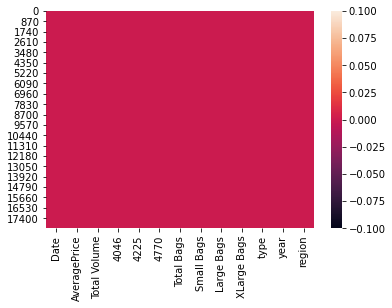

In [9]:
sns.heatmap(df.isnull())

There are no null values in this dataset, so we shall proceed with further analysis.

Date is in DateTime function. We may handle it and convert it to integer for further analysis. Year column is already present in the dataset, so we may remove date column.

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [11]:
df.drop('Date', inplace=True, axis=1)

In [12]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [13]:
df.columns

Index(['AveragePrice', 'Total Volume',           4046,           4225,
                 4770,   'Total Bags',   'Small Bags',   'Large Bags',
        'XLarge Bags',         'type',         'year',       'region',
              'Month',          'Day'],
      dtype='object')

In [14]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [15]:
cat_columns=[x for x in df.dtypes.index if df.dtypes[x] =='object']
cat_columns

['type', 'region']

In [16]:
num_columns=df.drop(['type', 'region'], axis=1)
num_columns.columns

Index(['AveragePrice', 'Total Volume',           4046,           4225,
                 4770,   'Total Bags',   'Small Bags',   'Large Bags',
        'XLarge Bags',         'year',        'Month',          'Day'],
      dtype='object')

# Target Variable

Region - Categorical type

Average Price- Continous variable.

In [17]:
df['region'].value_counts()

CincinnatiDayton       338
SouthCentral           338
Boston                 338
Houston                338
Orlando                338
Plains                 338
NewYork                338
Detroit                338
West                   338
HartfordSpringfield    338
Tampa                  338
NorthernNewEngland     338
GrandRapids            338
Northeast              338
SouthCarolina          338
DallasFtWorth          338
Charlotte              338
Nashville              338
Jacksonville           338
Denver                 338
BuffaloRochester       338
NewOrleansMobile       338
Pittsburgh             338
StLouis                338
RichmondNorfolk        338
SanFrancisco           338
California             338
Indianapolis           338
RaleighGreensboro      338
Louisville             338
Seattle                338
Philadelphia           338
BaltimoreWashington    338
Albany                 338
Columbus               338
Boise                  338
PhoenixTucson          338
G

<AxesSubplot:xlabel='region', ylabel='count'>

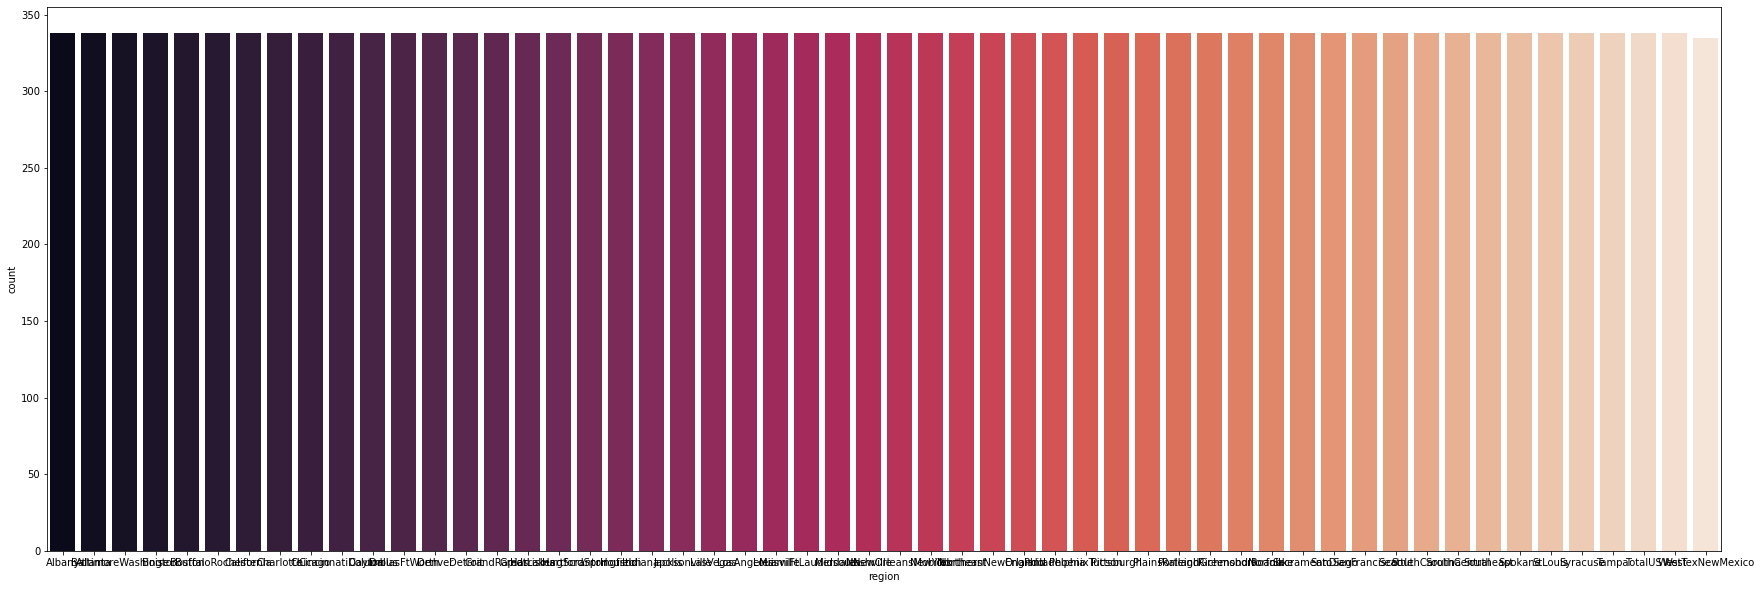

In [18]:
plt.figure(figsize=(30,10))
sns.countplot(df['region'],palette='rocket')

The distribution in region is same for all the region. The data seems to be balanced.

# Analyse Average Price

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

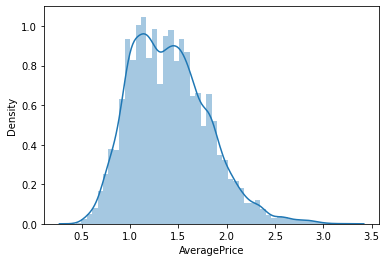

In [19]:
sns.distplot(df['AveragePrice'])

AveragePrice is distributed from 1.0 to 1.5

Text(0.5, 1.0, 'Average Price')

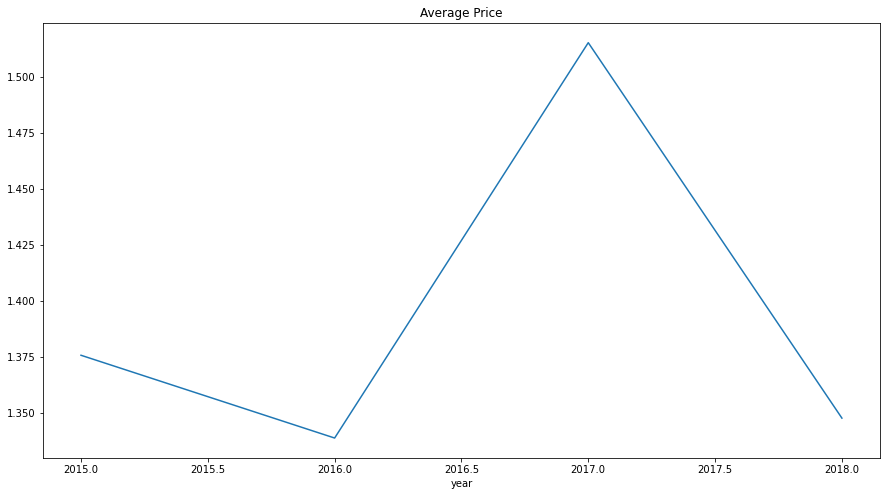

In [20]:
year=df.groupby('year').mean()
plt.figure(figsize=(15,8))
year['AveragePrice'].plot()
plt.title('Average Price')

This shows the average price of avocado at different years. Around 2017 the price was high.

Text(0.5, 1.0, 'Average Price')

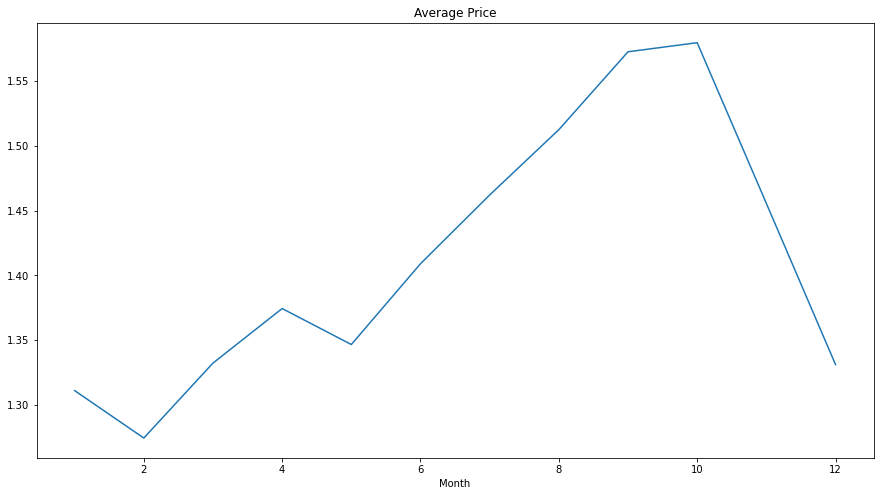

In [21]:
month=df.groupby('Month').mean()
plt.figure(figsize=(15,8))
month['AveragePrice'].plot()
plt.title('Average Price')

This shows the distribution of price in various months of the year. High price is recorded during September(9) to October(10). Febrary month records very low price.

Text(0.5, 1.0, 'Average Price')

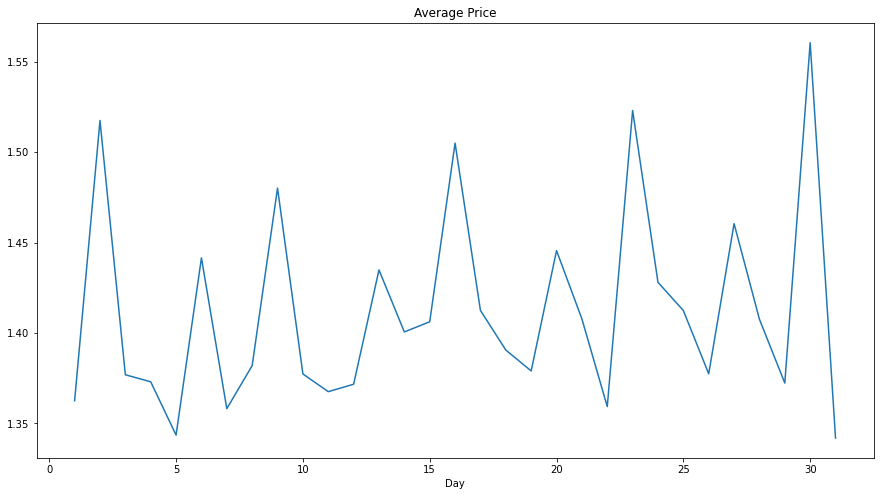

In [22]:
day=df.groupby('Day').mean()
plt.figure(figsize=(15,8))
day['AveragePrice'].plot()
plt.title('Average Price')

The price is high with the end of the month days.

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

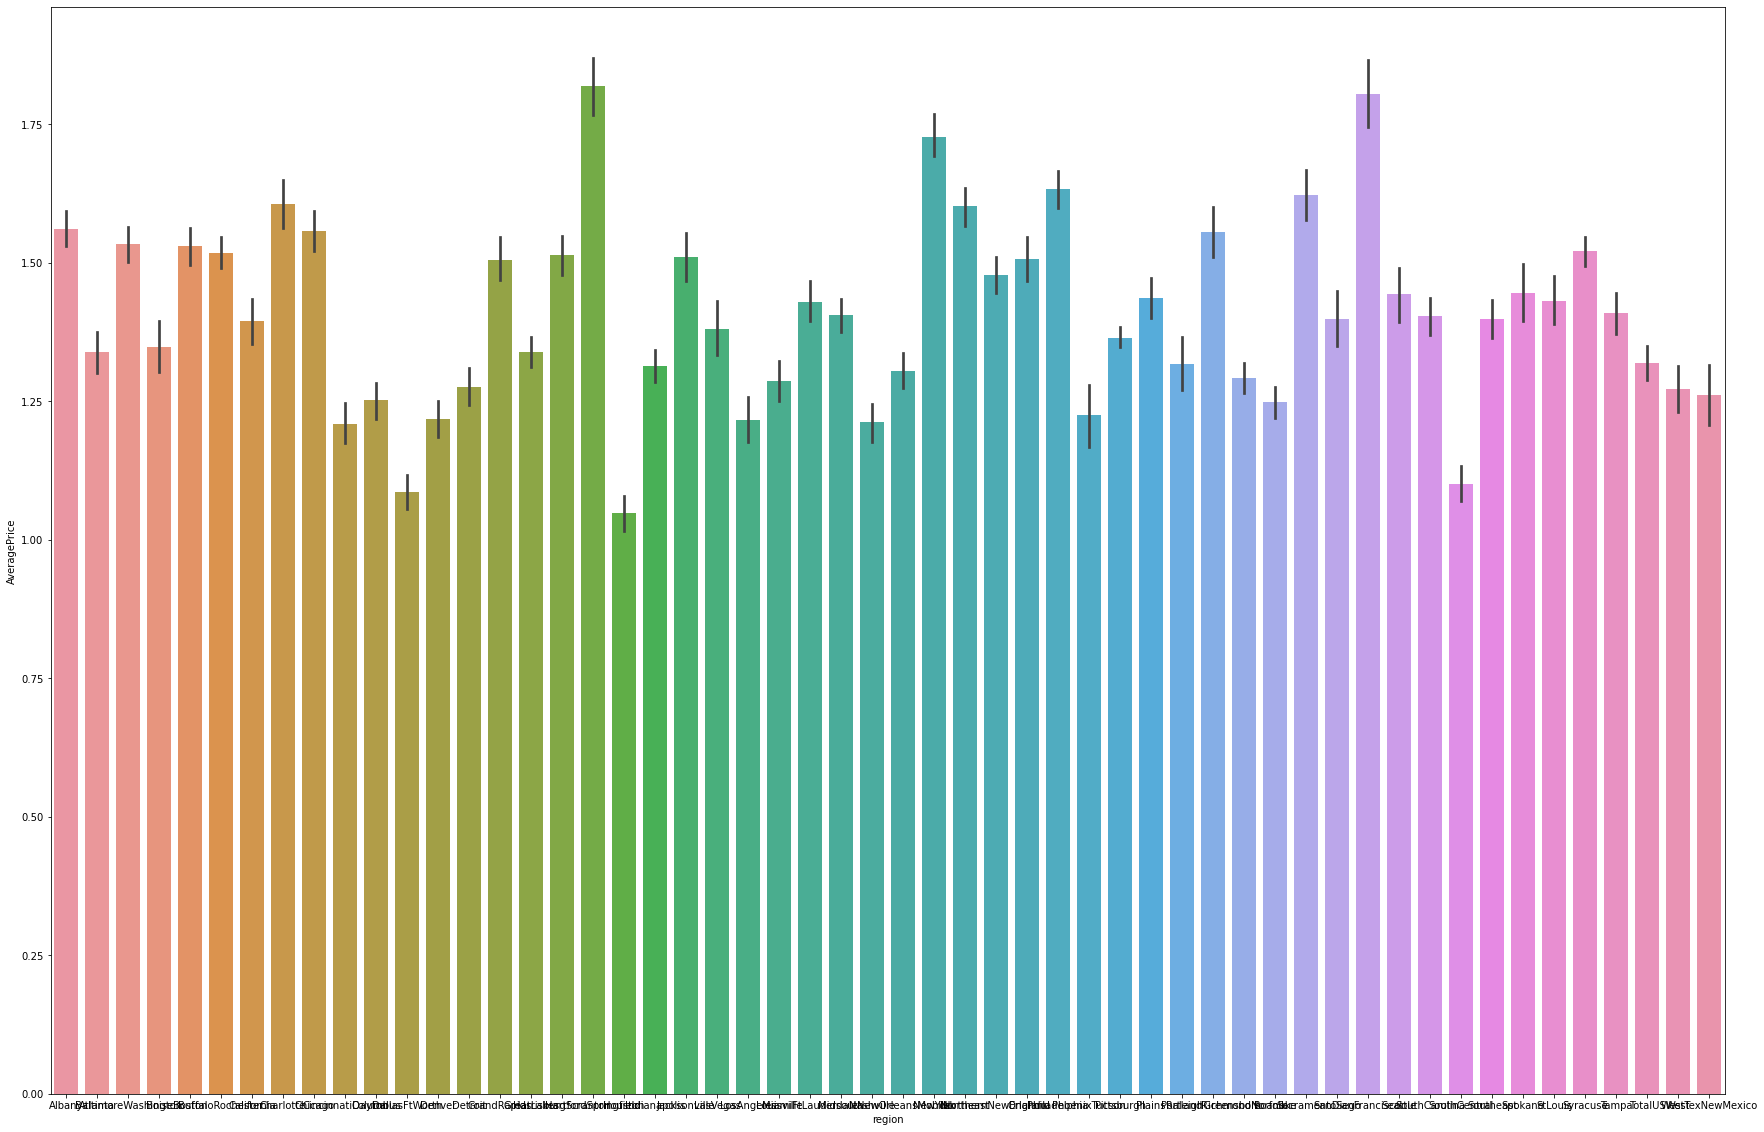

In [23]:
plt.figure(figsize=(30,20))
sns.barplot(x= df['region'], y=df['AveragePrice'])

The average price of avocado is high in Philadelpia and Nashville regions. Lowest price is registered with Columbus

<AxesSubplot:xlabel='region', ylabel='Total Bags'>

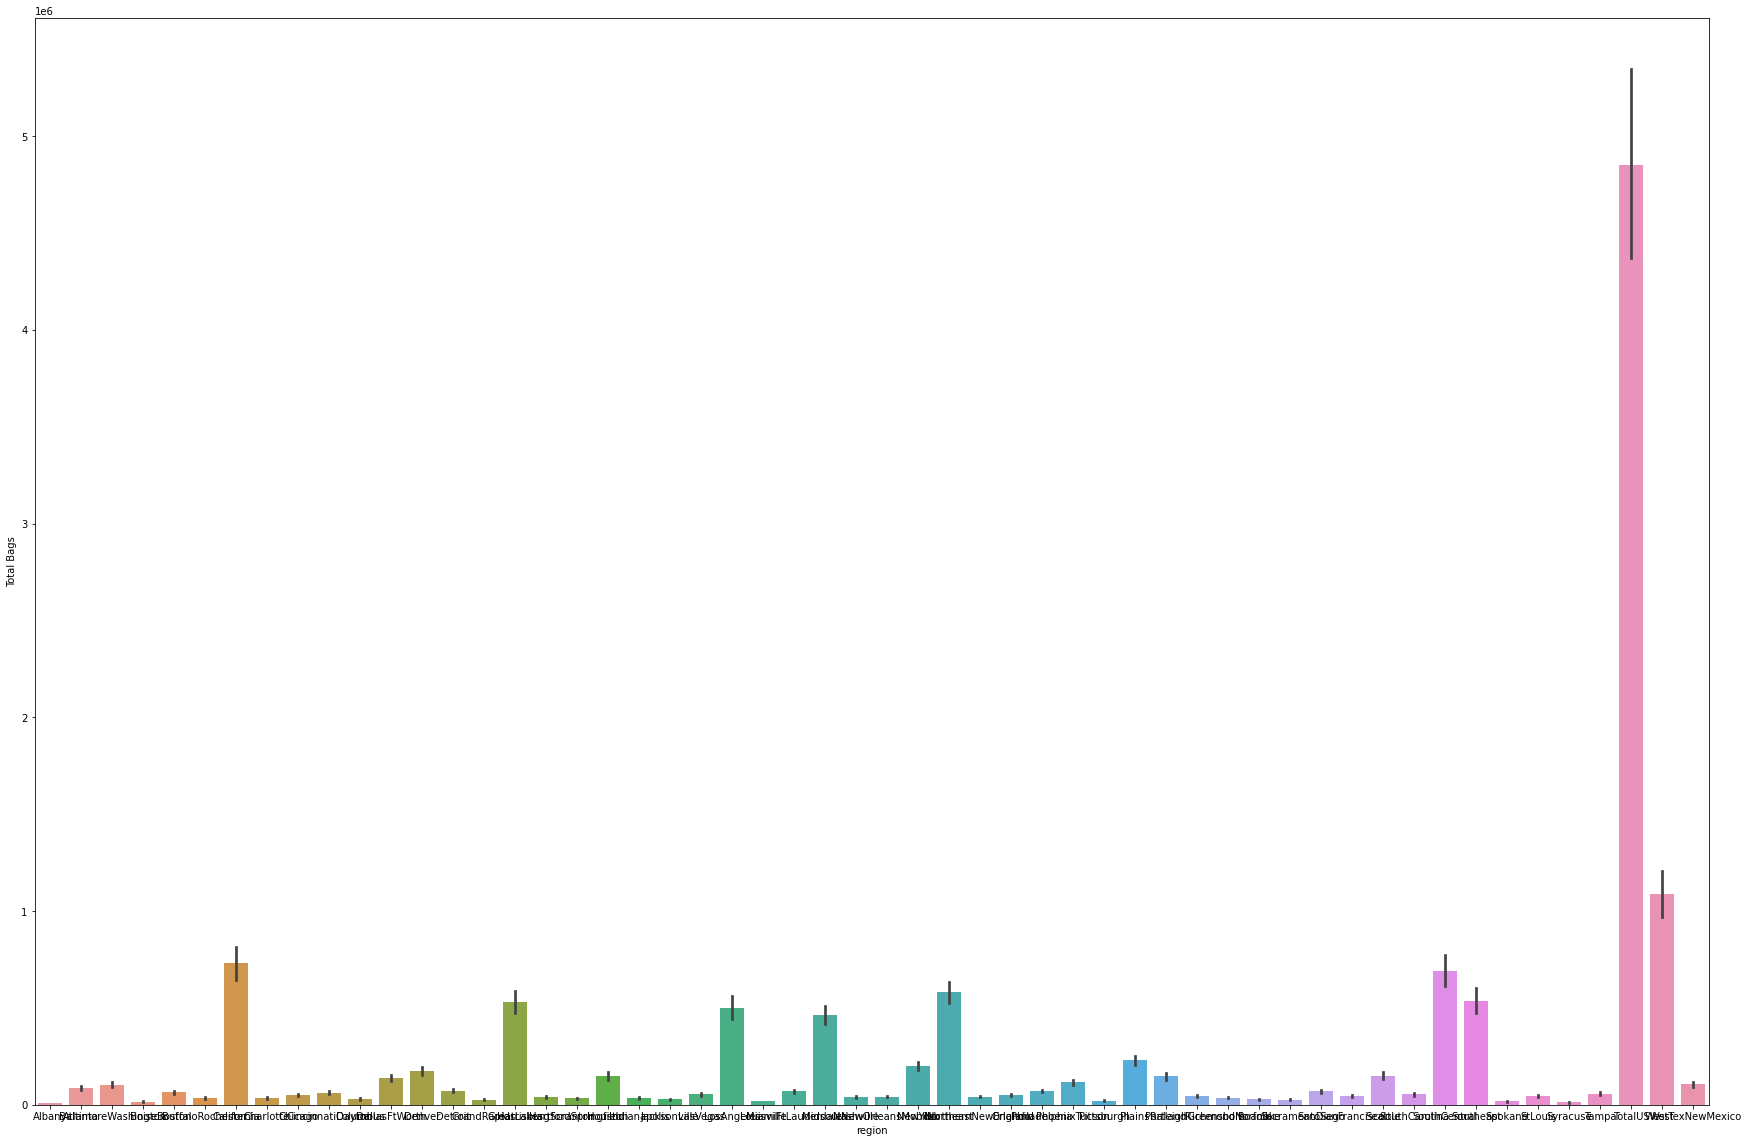

In [24]:
plt.figure(figsize=(30,20))
sns.barplot(x= df['region'], y=df['Total Bags'])

The total bags sold are high with SouthEast and SouthCaroline.

<AxesSubplot:xlabel='type', ylabel='count'>

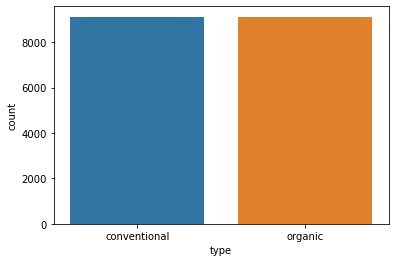

In [25]:
sns.countplot(df['type'])

Organic and Conventional fruits are distributed equally.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

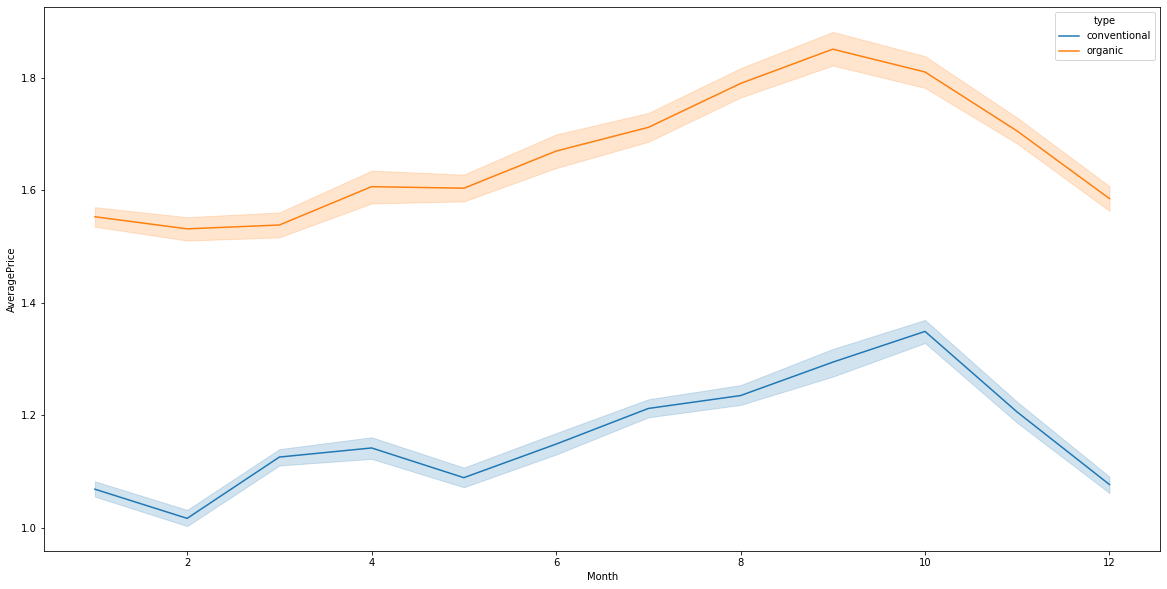

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(x= df['Month'], y=df['AveragePrice'], hue= df['type'])

There is a price hike between month 8–10 of both type of avocado both for type of avocado.
For the conventional type of avocado, in starting the price is high but then it get decreases and varies

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

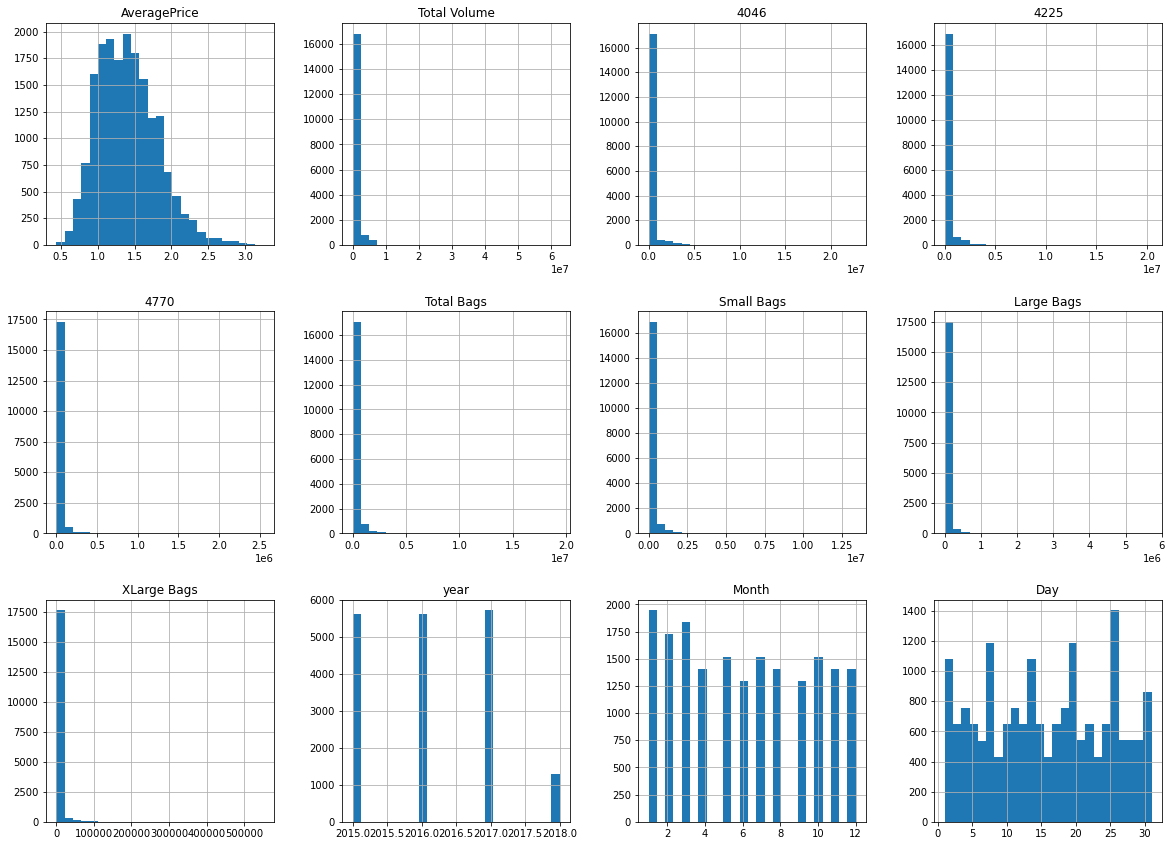

In [27]:
num_columns.hist(figsize=(20,20), grid=True, layout=(4,4), bins=25)

This plot shows the distribution of each columns. Most columns have right skewness in the dataset.

# Encode The Categorical variables

In [28]:
LE= LabelEncoder()

In [29]:
df['region']= LE.fit_transform(df['region'])

In [30]:
df['type']= LE.fit_transform(df['type'])

In [31]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [32]:
df['XLarge Bags'].value_counts()

0.00        12048
3.33           29
6.67           16
1.11           15
5.00           12
            ...  
9.95            1
3.47            1
59.32           1
16090.51        1
4920.17         1
Name: XLarge Bags, Length: 5588, dtype: int64

# Data Description

In [33]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000,31.000000


# Correlation

In [34]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013


<AxesSubplot:>

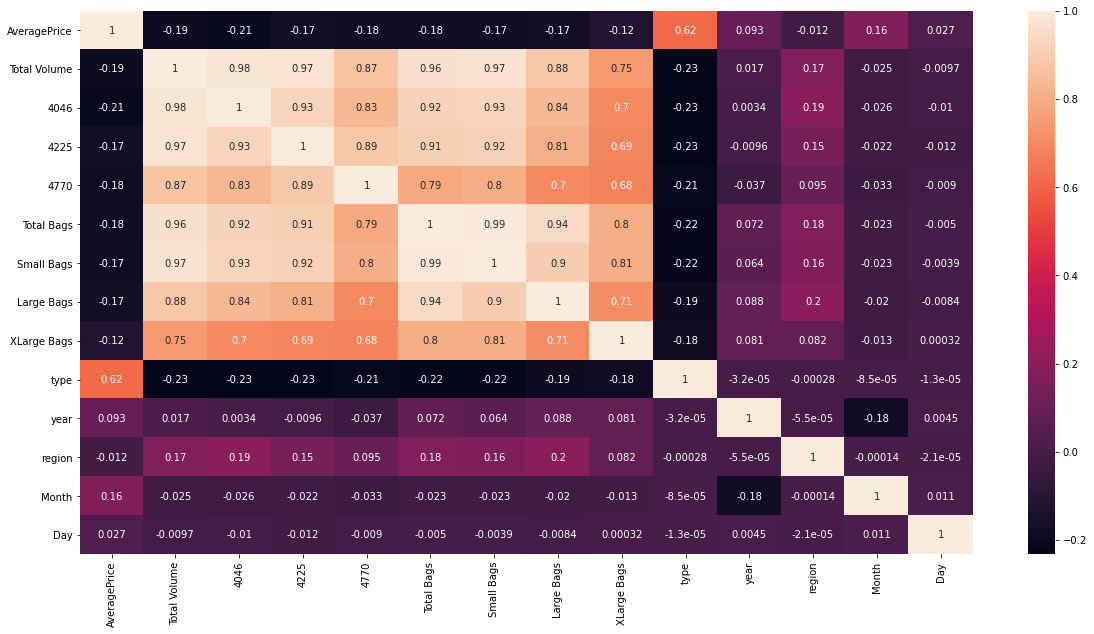

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

'Total Volume', 4046, 4225, 4770, 'Total Bags','Small Bags','Large Bags','XLarge Bags' columns are highly correlated to each other and are in good correlation with the region.

Type of avocado is in good correlation with AveragePrice.

# Check For Multi Collinearity- VIF

Target- AveragePrice

In [667]:
price_df= df

In [577]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [578]:
df1=price_df.drop('AveragePrice', axis=1)

In [579]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [580]:
vif_fun()

,vif_factor,features
0,5.212907e+09,Total Volume
1,6.947630e+08,4046
2,6.333557e+08,4225
3,4.973838e+06,4770
4,2.502000e+14,Total Bags
5,1.429714e+14,Small Bags
6,1.521486e+13,Large Bags
7,7.856874e+10,XLarge Bags
8,2.123126e+00,type
9,1.125114e+01,year


We shall drop columns Large Bags, XLarge Bags and keep only Total Bags since they all contribute same to the target.

We shall drop 4046, 4770 since they are highly correlated to each other. 

In [581]:
df1.drop(['Total Bags','Small Bags','Large Bags', 'XLarge Bags'],  axis=1, inplace=True)

In [582]:
df1.drop(['Total Volume', 4046, 4225, 4770],  axis=1,inplace=True)

These columns have a large collinearity with each other and it may affect the model to a very large extent, so dropped the columns

Target- Region

In [668]:
df2= df.drop('region', axis=1 )

In [669]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
    vif['features']= df2.columns
    return(vif)

In [670]:
vif_fun()

,vif_factor,features
0,2.290614e+01,AveragePrice
1,5.212539e+09,Total Volume
2,6.947141e+08,4046
3,6.333111e+08,4225
4,4.973475e+06,4770
5,2.502000e+14,Total Bags
6,1.429714e+14,Small Bags
7,1.521486e+13,Large Bags
8,7.856737e+10,XLarge Bags
9,3.399857e+00,type


We shall drop columns Large Bags, XLarge Bags and keep only Total Bags since they all contribute same to the target.

We shall drop 4225, 4770 since they are highly correlated to each other.

In [534]:
df2.drop(['Small Bags','Large Bags', 'XLarge Bags'],  axis=1)

In [535]:
df2.drop([4046,4225,4770],  axis=1)

In [671]:
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14


# Remove Skewness

Target1- AveragePrice

In [587]:
df1.skew().sort_values(ascending=False)

year      0.215339
Month     0.106617
Day       0.014310
type      0.000329
region    0.000030
dtype: float64

Columns- Total Bags, Small Bags, Total Volume, 4225 has high skewness and are handled with Power Transform Method

In [588]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [589]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_new= sc.fit_transform(df1_new)
df1_new

array([[-0.99983562, -1.22187884, -2.01155231,  1.49434741,  1.22928497],
       [-0.99983562, -1.22187884, -2.01155231,  1.49434741,  0.54100493],
       [-0.99983562, -1.22187884, -2.01155231,  1.49434741, -0.21556953],
       ...,
       [ 1.00016441,  1.96856389,  1.54383806, -1.64204669,  0.64284151],
       [ 1.00016441,  1.96856389,  1.54383806, -1.64204669, -0.10195902],
       [ 1.00016441,  1.96856389,  1.54383806, -1.64204669, -0.95485351]])

In [590]:
df1=pd.DataFrame(df1_new, columns= df1.columns)
df1

,type,year,region,Month,Day
0,-0.999836,-1.221879,-2.011552,1.494347,1.229285
1,-0.999836,-1.221879,-2.011552,1.494347,0.541005
2,-0.999836,-1.221879,-2.011552,1.494347,-0.215570
3,-0.999836,-1.221879,-2.011552,1.494347,-1.091311
4,-0.999836,-1.221879,-2.011552,1.278438,1.416727
...,...,...,...,...,...
18244,1.000164,1.968564,1.543838,-1.220706,-1.382073
18245,1.000164,1.968564,1.543838,-1.642047,1.323455
18246,1.000164,1.968564,1.543838,-1.642047,0.642842
18247,1.000164,1.968564,1.543838,-1.642047,-0.101959


In [591]:
df1.skew().sort_values(ascending=False)

year      0.213156
type      0.000329
Month    -0.146584
Day      -0.208462
region   -0.261443
dtype: float64

In [592]:
df1['AveragePrice']= df['AveragePrice']

Target2-Region

In [672]:
df2.skew().sort_values(ascending=False)

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
AveragePrice     0.580303
year             0.215339
Month            0.106617
Day              0.014310
type             0.000329
dtype: float64

Columns- Total Bags, XLarge Bags, Small Bags, Total Volume, 4026 has high skewness and are handled with Power Transform Method

In [673]:
from sklearn.preprocessing import power_transform
df2_new= power_transform(df2)

In [674]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df2_new= sc.fit_transform(df2_new)
df2_new

array([[-0.08624822, -0.08660524, -0.65861896, ..., -1.22187884,
         1.49434741,  1.22928497],
       [-0.03402196, -0.15574567, -0.77686953, ..., -1.22187884,
         1.49434741,  0.54100493],
       [-1.27393796,  0.17932662, -0.73194656, ..., -1.22187884,
         1.49434741, -0.21556953],
       ...,
       [ 1.14779044, -0.77150535, -0.61983119, ...,  1.96856389,
        -1.64204669,  0.64284151],
       [ 1.2658763 , -0.69807719, -0.55028196, ...,  1.96856389,
        -1.64204669, -0.10195902],
       [ 0.61828746, -0.66380937, -0.36790819, ...,  1.96856389,
        -1.64204669, -0.95485351]])

In [675]:
df2=pd.DataFrame(df2_new, columns= df2.columns)
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221879,1.494347,1.229285
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221879,1.494347,0.541005
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221879,1.494347,-0.215570
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221879,1.494347,-1.091311
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221879,1.278438,1.416727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968564,-1.220706,-1.382073
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968564,-1.642047,1.323455
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968564,-1.642047,0.642842
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968564,-1.642047,-0.101959


In [676]:
df2.skew().sort_values(ascending=False)

XLarge Bags     0.793520
year            0.213156
4770            0.032184
Total Volume    0.011171
Small Bags      0.007058
AveragePrice    0.005596
type            0.000329
Total Bags     -0.001626
4225           -0.017740
4046           -0.022679
Large Bags     -0.073809
Month          -0.146584
Day            -0.208462
dtype: float64

In [677]:
df2['region']= df['region']

Skewness is removed from the dataset. So we shall proceed with Outliers removal

# CHeck Outliers

Target1- AveragePrice

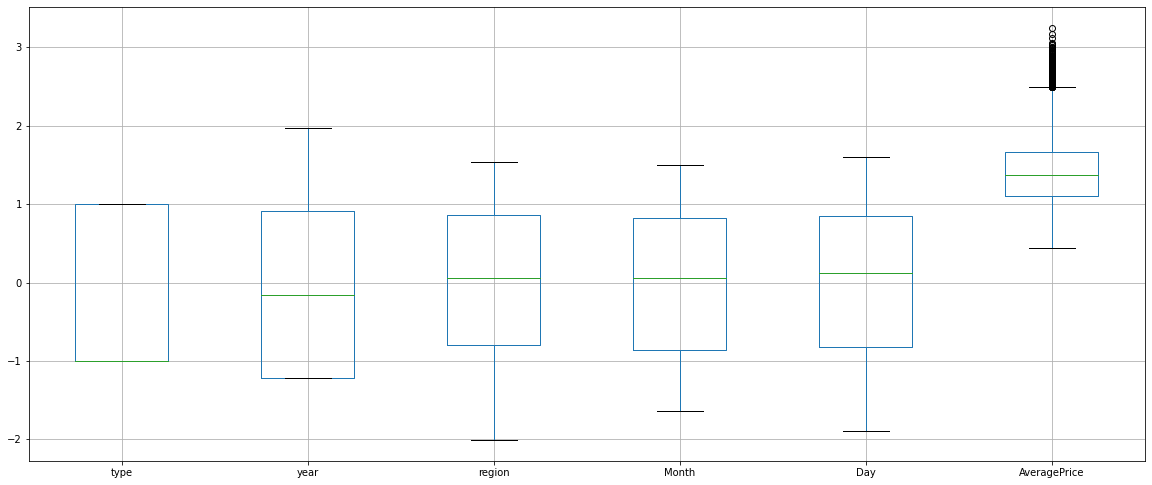

In [593]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

Columns TotalBags,  Average price seems to have outliers in it.

In [594]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.99983562, 1.22187884, 2.01155231, 1.49434741, 1.22928497,
        0.18868864],
       [0.99983562, 1.22187884, 2.01155231, 1.49434741, 0.54100493,
        0.13901962],
       [0.99983562, 1.22187884, 2.01155231, 1.49434741, 0.21556953,
        1.18206895],
       ...,
       [1.00016441, 1.96856389, 1.54383806, 1.64204669, 0.64284151,
        1.15237477],
       [1.00016441, 1.96856389, 1.54383806, 1.64204669, 0.10195902,
        1.30138182],
       [1.00016441, 1.96856389, 1.54383806, 1.64204669, 0.95485351,
        0.53151208]])

In [595]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([11320, 11321, 11323, 11324, 11325, 11326, 11327, 11328, 11329,
       11330, 11331, 11332, 12821, 12823, 13033, 13035, 13037, 13038,
       13395, 13657, 13661, 14019, 14020, 14073, 14074, 14119, 14120,
       14121, 14122, 14123, 14124, 14125, 14126, 14128, 14129, 14177,
       14385, 14699, 14701, 14702, 14807, 14911, 14912, 14913, 14914,
       14915, 14916, 14917, 14918, 14919, 15124, 15125, 15127, 15128,
       15129, 15130, 15510, 15511, 15667, 15668, 15671, 15673, 15674,
       15814, 15871, 16024, 16050, 16055, 16395, 16399, 16421, 16660,
       16661, 16662, 16663, 16664, 16665, 16666, 16667, 16714, 16715,
       16717, 16718, 16719, 16720, 16721, 16734, 16737, 16738, 16985,
       16986, 16994, 16995, 16996, 16997, 16998, 16999, 17000, 17007,
       17008, 17009, 17010, 17015, 17017, 17031, 17032, 17033, 17034,
       17035, 17036, 17037, 17038, 17039, 17040, 17047, 17244, 17245,
       17246, 17247, 17248, 17249, 17250, 17251, 17255, 17300, 17301,
       17302, 17303

In [596]:
df1_new= df1[(z<3).all(axis=1)]

In [597]:
df1_new.shape

(18118, 6)

In [598]:
df.shape

(18249, 14)

In [599]:
loss_percent1= (18249-18118)/18249*100
loss_percent1

0.7178475532905912

df2

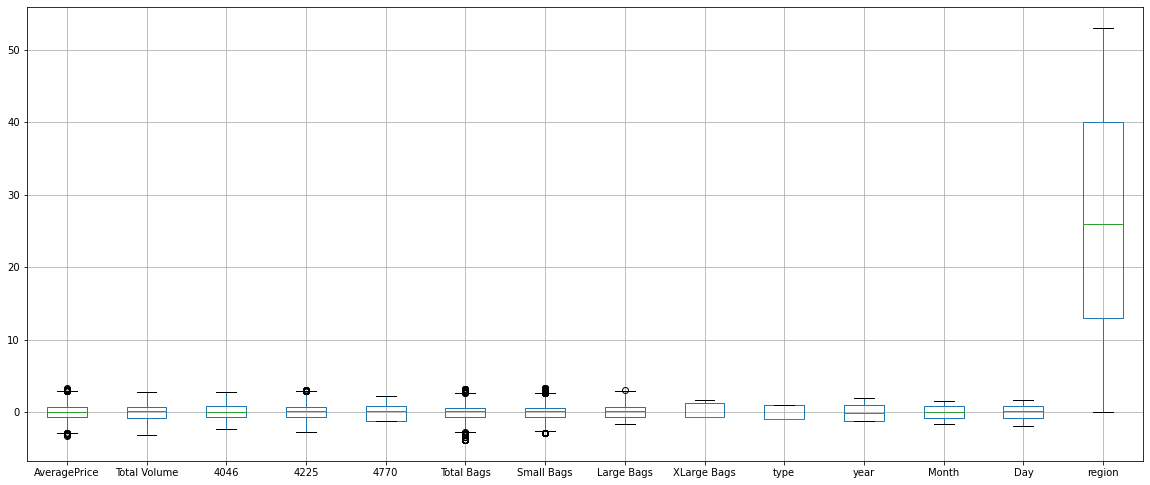

In [678]:
df2.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

Total Bags and average Price has outliers in it.

Target2- Region

In [679]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

array([[0.08624822, 0.08660524, 0.65861896, ..., 1.49434741, 1.22928497,
        1.7002522 ],
       [0.03402196, 0.15574567, 0.77686953, ..., 1.49434741, 0.54100493,
        1.7002522 ],
       [1.27393796, 0.17932662, 0.73194656, ..., 1.49434741, 0.21556953,
        1.7002522 ],
       ...,
       [1.14779044, 0.77150535, 0.61983119, ..., 1.64204669, 0.64284151,
        1.70081131],
       [1.2658763 , 0.69807719, 0.55028196, ..., 1.64204669, 0.10195902,
        1.70081131],
       [0.61828746, 0.66380937, 0.36790819, ..., 1.64204669, 0.95485351,
        1.70081131]])

In [680]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([ 1716,  2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,
        5481,  5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,
        5490,  5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,
        5506,  7412,  8319,  8322,  8344,  8344,  8345,  8345,  8346,
        8346,  8347,  8347,  8348,  8348,  8349,  8349,  8350,  8351,
        8352,  8352,  8353,  8353,  8354,  8354,  8355,  8356,  8357,
        8358,  8359,  8360,  8361,  8362,  8363,  8364,  8365,  8365,
        8366,  8366,  8366,  8367,  8367,  8368,  8369,  8370,  8371,
        9090,  9090,  9091,  9091,  9092,  9092,  9093,  9093,  9094,
        9094,  9095,  9096,  9096,  9097,  9097,  9097,  9097,  9098,
        9098,  9099,  9099,  9100,  9101,  9212,  9894, 10381, 11024,
       11320, 11321, 11322, 11325, 11326, 11332, 11333, 11336, 11338,
       11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387, 11388,
       11594, 11595, 11596, 11597, 11614, 11662, 12132, 14124, 14125,
       14404, 15261

In [684]:
df2_new= df2[(z<3).all(axis=1)]

In [685]:
df2_new.shape

(18141, 14)

Percent Loss

In [686]:
loss_percent= (18249-18141)/18249*100
loss_percent

0.5918132500410981

 Only 0.6% of the data is lost. So we shall try to train the Model.

# Target- AveragePrice

In [687]:
x= df1_new.iloc[:,0:-1]
y=df1_new.iloc[:,-1]


In [629]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18118, dtype: float64

Since the Target variable is continous we shall use Regression Models.

# Training The Model

In [630]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Check the best Random State

# LinearRegression

In [604]:
maxr2=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    predlr= lr.predict(xtest)
    r2= r2_score(ytest,predlr)
    if r2>maxr2:
        maxr2=r2
        maxRS=i
print("Best Accuracy_score is", maxr2, 'on Random_state',maxRS)

Best Accuracy_score is 0.6985161842186903 on Random_state 84


# To Find the Best Cross Validation Score 

In [609]:
pred_tr= lr.predict(xtrain)
pred_ts= lr.predict(xtest)

In [610]:
train_accuracy= r2_score(ytrain,pred_tr)
test_accuracy= r2_score(ytest,pred_ts)

In [611]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is -0.9417289410869395 and accuracy score for training is 0.4273873759796214 and the accuracy for testing is 0.5565698440795079


At cross fold 3 the cv score is -0.05939113384582447 and accuracy score for training is 0.4273873759796214 and the accuracy for testing is 0.5565698440795079


At cross fold 4 the cv score is -0.06959699184731269 and accuracy score for training is 0.4273873759796214 and the accuracy for testing is 0.5565698440795079


At cross fold 5 the cv score is 0.051482310176254306 and accuracy score for training is 0.4273873759796214 and the accuracy for testing is 0.5565698440795079


At cross fold 6 the cv score is -0.09130638833301404 and accuracy score for training is 0.4273873759796214 and the accuracy for testing is 0.5565698440795079


At cross fold 7 the cv score is 0.006856698800596536 and accuracy score for training is 0.4273873759796214 and the accuracy for testing is 0.5565698440795079


At cross fold 8 the cv score is -0.035479

 r2 score is good with random State-84, cv-5. So we shall test the score with other models

In [631]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=84)

# LinearRegression

In [632]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr= lr.predict(xtest)
print('R2=', r2_score(ytest,predlr))
print('MSE=', mean_squared_error(ytest,predlr))
print('MBE=', mean_absolute_error(ytest,predlr))

R2= 0.6985161842186903
MSE= 0.026417820841653044
MBE= 0.13149994225740308


In [633]:
cr_lr=cross_val_score(lr,x,y, cv=5)
print('Cross Validation Score of LinearRegression is:', cr_lr.mean())

Cross Validation Score of LinearRegression is: 0.051482310176254306


##### Decision Tree Regressor

In [615]:
dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('Score:',dtc.score(xtrain,ytrain))
print('mean_squared_error', mean_squared_error(ytest,preddtc))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))

Score: 1.0
mean_squared_error 0.061105
mean_absolute_error: 0.1795
r2_score: 0.5166995893073592


In [616]:
cr_dtc=cross_val_score(dtc,x,y, cv=5)
print('Cross Validation Score of DecisionTreeRegressor is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeRegressor is: -0.07171628528704203


# RandomForestRegressor

In [617]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,predrf))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

mean_squared_error 0.03032811349999993
mean_absolute_error: 0.14743499999999982
Rf Score 0.9797912231806749
r2_score: 0.7347826623049469


In [618]:
cr_rf=cross_val_score(rf,x,y, cv=9)
print('Cross Validation Score of RandomForestRegressor is:', cr_rf.mean())

Cross Validation Score of RandomForestRegressor is: 0.11798179132738995


# KNN

In [619]:
knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,predknn))
print('mean_absolute_error:', mean_absolute_error(predknn,ytest))
print('Rf Score', knn.score(xtrain,ytrain))
print('r2_score:', r2_score(predknn,ytest))

mean_squared_error 0.02980179999999999
mean_absolute_error: 0.1443
Rf Score 0.6349195833538809
r2_score: 0.7160808297636784


In [620]:
cr_rf=cross_val_score(knn,x,y, cv=9)
print('Cross Validation Score of RandomForestRegressor is:', cr_rf.mean())

Cross Validation Score of RandomForestRegressor is: -0.18056192180362812


Among all the models, Linear regression shows r2 score of 70%, CV score is very less. So we may check with Regularization Techniques, Since Linear Regression has no HyperParameter Tuning.

In [634]:
ls=Lasso(alpha= 0.0001)
ls.fit(xtrain,ytrain)
predls= ls.predict(xtest)
print('R2=', r2_score(ytest,predls))
print('MSE=', mean_squared_error(ytest,predls))
print('MBE=', mean_absolute_error(ytest,predls))

R2= 0.6986528068754125
MSE= 0.0264058491447351
MBE= 0.1315110382766201


In [635]:
rd=Ridge(alpha= 0.0001)         
ls.fit(xtrain,ytrain)
predls= ls.predict(xtest)
print('R2=', r2_score(ytest,predls))
print('MSE=', mean_squared_error(ytest,predls))
print('MBE=', mean_absolute_error(ytest,predls))

R2= 0.6986528068754125
MSE= 0.0264058491447351
MBE= 0.1315110382766201


# HyperParameter Tuning With GridSearchCV

In [468]:
from sklearn.model_selection import GridSearchCV

In [636]:
Lasso()

Lasso()

In [637]:
parameters={'alpha': [0.0001,0.001,0.01,0.1,1],
            'fit_intercept':['True', 'False'],
            'max_iter':[500,1000,2000,5000],
            'selection':['cyclic', 'random']}

In [638]:
GCV=GridSearchCV(Lasso(), parameters, cv=5, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'alpha': 0.0001,
 'fit_intercept': 'False',
 'max_iter': 500,
 'selection': 'random'}

In [639]:
GCV.best_estimator_

Lasso(alpha=0.0001, fit_intercept='False', max_iter=500, selection='random')

In [641]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.698652497921334

In [646]:
ls=Lasso(alpha= 0.0001,
         fit_intercept= 'False',
         max_iter= 500,
         selection= 'random')
ls.fit(xtrain,ytrain)
predls= ls.predict(xtest)
print('R2=', r2_score(ytest,predls))
print('MSE=', mean_squared_error(ytest,predls))
print('MBE=', mean_absolute_error(ytest,predls))

R2= 0.698652562342927
MSE= 0.026405870572138678
MBE= 0.1315110379156057


After tuning the Hyper parameters, Lasso gives the accuracy of 70% which indicates the accuracy provided by Regression is true without overfitting.

# Save The Model

In [647]:
import pickle
filename= 'Avocado.pkl'
pickle.dump(ls,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [648]:
x=np.array(ytest)
predicted= np.array(ls.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,1.03,1.186141
1,1.46,1.529055
2,1.53,1.690142
3,0.94,1.154292
4,1.88,1.628665
5,1.51,1.500471
6,0.94,1.332833
7,1.60,1.656630
8,1.36,1.312639
9,1.21,1.111855


The predicted values are equal to the original values, So the model works good with the dataset.

# Target- Region

In [688]:
df2_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221879,1.494347,1.229285,0
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221879,1.494347,0.541005,0
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221879,1.494347,-0.215570,0
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221879,1.494347,-1.091311,0
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221879,1.278438,1.416727,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968564,-1.220706,-1.382073,53
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968564,-1.642047,1.323455,53
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968564,-1.642047,0.642842,53
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968564,-1.642047,-0.101959,53


In [689]:
x= df2_new.iloc[:,0:-1]
y=df2_new.iloc[:,-1]


In [690]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18141, dtype: int32

# Check the best Random State

In [692]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(xtrain,ytrain)
    preddtc= dtc.predict(xtest)
    acc= accuracy_score(ytest,preddtc)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 1.0 on Random_state 4


CV Score 

In [693]:
pred_tr= dtc.predict(xtrain)
pred_ts= dtc.predict(xtest)

In [694]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [695]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(dtc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.04883828992328923 and accuracy score for training is 1.0 and the accuracy for testing is 0.8


At cross fold 3 the cv score is 0.4241772779890855 and accuracy score for training is 1.0 and the accuracy for testing is 0.8


At cross fold 4 the cv score is 0.47533023816329584 and accuracy score for training is 1.0 and the accuracy for testing is 0.8


At cross fold 5 the cv score is 0.5511858868121948 and accuracy score for training is 1.0 and the accuracy for testing is 0.8


At cross fold 6 the cv score is 0.5400376216204863 and accuracy score for training is 1.0 and the accuracy for testing is 0.8


At cross fold 7 the cv score is 0.6046425116925567 and accuracy score for training is 1.0 and the accuracy for testing is 0.8


At cross fold 8 the cv score is 0.6177104508829623 and accuracy score for training is 1.0 and the accuracy for testing is 0.8


At cross fold 9 the cv score is 0.6233283442960862 and accuracy score for training is 1.0 and the accu

In [696]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=4)

# DecisionTreeClassifier

In [697]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('acc=', accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

acc= 0.95
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00    

In [698]:
cr_dtc=cross_val_score(dtc,x,y, cv=9)
print('Cross Validation Score of DecisionTreeClassifier is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.6168223826153933


# RandomForestClassifier

In [699]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('acc=', accuracy_score(ytest,predrf))
print(confusion_matrix(ytest,predrf))
print(classification_report(ytest,predrf))

acc= 0.95
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          14    

In [700]:
cr_rf=cross_val_score(rf,x,y, cv=9)
print('Cross Validation Score of RandomForestClassifier is:', cr_rf.mean())

Cross Validation Score of RandomForestClassifier is: 0.7679718031868571


# KNeighborsClassifier

In [701]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('acc=', accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

acc= 0.8
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           6       1.

In [702]:
cr_knn=cross_val_score(knn,x,y, cv=9)
print('Cross Validation Score ofKneighborsClassifier is:', cr_knn.mean())

Cross Validation Score ofKneighborsClassifier is: 0.4951128496155378


# SVC

In [703]:
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('acc=', accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

acc= 0.8
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           6       1.

In [704]:
cr_svc=cross_val_score(svc,x,y, cv=9)
print('Cross Validation Score of SVC is:', cr_svc.mean())

Cross Validation Score of SVC is: 0.6819242585371619


Among all the models, SVC provides the accuracy which is less different from CV score. So we shall fine tune the model to improve it further without being overfitted.

# Hyper Parameter Tuning with GridSearchCV

In [705]:
SVC()

SVC()

In [710]:
parameters={'cache_size': [100,200,300,400]}
           

In [711]:
GCV=GridSearchCV(SVC(), parameters, cv=9, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'cache_size': 100}

In [ ]:
parameters={'kernel': ['linear', 'poly', 'rbf'],
            'gamma': ['scale', 'auto']}

In [707]:
GCV=GridSearchCV(SVC(), parameters, cv=9, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [712]:
GCV.best_estimator_

SVC(cache_size=100)

In [713]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.8

In [715]:
svc=SVC(kernel= 'rbf',
        cache_size=100,
        gamma = 'scale')
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('acc=', accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

acc= 0.8
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           6       1.

# Save The Model

In [716]:
import pickle
filename= 'Avocado_region.pkl'
pickle.dump(svc,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [717]:
x=np.array(ytest)
predicted= np.array(svc.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,3,23
1,21,21
2,41,41
3,23,23
4,40,40
5,7,7
6,38,44
7,20,20
8,46,46
9,52,52


The predicted values are nearly close to the original values. the accuracy is about 85%. So the model works well with the dataset

AveragePrice - The prediction rate is nearly equal to 80%

Region- The prediction rate is equal to 85%. 

The model performs well both in Regression model and Classification model with the dataset.